In [457]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy

In [458]:
NCAP_Funding = pd.read_csv('NCAP_Funding.csv')
State_data = pd.read_csv('State_data.csv')
Data = pd.read_csv('Data.csv')

# Spatial aggregation. [4 Marks]

1.Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [ ]:
#Selecting only Two columns to increase efficiency
Data1_1=Data[["PM2.5","state"]]
#Groupby by state and took mean for PM2.5
AvgPM2_5=Data1_1.groupby(["state"]).mean()
#Took the max value for PM2.5 means and printed the location
AvgPM2_5.loc[AvgPM2_5['PM2.5']==AvgPM2_5['PM2.5'].max()]

,PM2.5
state,
Delhi,104.100918


2.Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?

In [ ]:
#Created a new dataframe with required condition.
Data1_2=Data[Data['PM2.5']>300]
#Converted the scalar value to pandas datetime object.
Data1_2['Timestamp'] = pd.to_datetime(Data1_2['Timestamp'])
#Set the index to timestamp and selected the required date range (year 2023)
df = Data1_2.set_index('Timestamp')
date_range = df.loc['2023-01-01':'2023-12-31']
#Selected two columns consisting of states and PM2.5 representing count the number of times the state has repeated by setting index to state.
date_range=date_range[["PM2.5",'state']]
date_range.set_index('state')
#Found value of max number of days (PM2.5 Column) 
final=date_range.groupby(['state']).count()
final.loc[final["PM2.5"]==final["PM2.5"].max()]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\1064107549.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1_2['Timestamp'] = pd.to_datetime(Data1_2['Timestamp'])


,PM2.5
state,
Delhi,470


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [ ]:
#Made a new Dataframe to reduce runtime and converted the date to pandas datetime object
Data1_3=Data[["Timestamp","PM2.5","state"]]
Data1_3["Timestamp"]=pd.to_datetime(Data1_3["Timestamp"])
#Made the axis of timestamp and then took the range of values for year 2023 .
Data1_3=Data1_3.set_index("Timestamp").loc['2023-01-01':'2023-12-31']
#Calculate the standard deviation by std over the groub by values after setting index to state.
Data1_3.set_index("state")
Data1_3=Data1_3.groupby(["state"]).std()
#Squared the values to calculate the variance and then returned the maximum value.
Data1_3["PM2.5"]=Data1_3["PM2.5"]**2
Data1_3.loc[Data1_3["PM2.5"]==Data1_3["PM2.5"].max()]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\2476427187.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1_3["Timestamp"]=pd.to_datetime(Data1_3["Timestamp"])


,PM2.5
state,
Delhi,6855.360723


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [ ]:
#Made a new Dataframe to reduce runtime and converted the date to pandas datetime object
Data1_4=Data[["Timestamp","PM2.5","state"]]
Data1_4["Timestamp"]=pd.to_datetime(Data1_4["Timestamp"])
#Made the axis of timestamp and then took the range of values for Covid Phase (2020 and 2021).
Data1_4=Data1_4.set_index("Timestamp").loc['2020-01-01':'2021-12-31']
Data1_4.set_index("state")
#Returned the state with minimum value of the PM2.5 after grouping it by state and calculating the mean.
Data1_4=Data1_4.groupby(["state"]).mean()
Data1_4.loc[Data1_4["PM2.5"]==Data1_4["PM2.5"].min()]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\2587160383.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1_4["Timestamp"]=pd.to_datetime(Data1_4["Timestamp"])


,PM2.5
state,
Mizoram,14.32335


# Temporal Aggregation [3 Marks]

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [ ]:
#Made a new Dataframe and converted the date to pandas datetime object
Data2_1=Data[["Timestamp","PM2.5","station"]]
Data2_1["Timestamp"]=pd.to_datetime(Data2_1["Timestamp"])
#Select the Time period (Aug 2020).
Data2_1=Data2_1.set_index("Timestamp").loc['2020-08-01':'2020-08-31']
#Finding the max and then station.
Max=Data2_1.loc[Data2_1["PM2.5"]==Data2_1["PM2.5"].max()]
Max.loc[:,"station"]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\2931248375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data1_5["Timestamp"]=pd.to_datetime(Data1_5["Timestamp"])


Timestamp
2020-08-07    Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
Name: station, dtype: object

2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?

In [444]:
#Shortlisting the data for better runtime and converted the date to pandas datetime object.
Data2_2=Data[["Timestamp","station","PM2.5"]]
Data2_2["Timestamp"]=pd.to_datetime(Data2_2["Timestamp"])
#Required station values filtering.
Data2_2=Data2_2[Data2_2["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
#Acquiring dataframes on the basis of season
Winter=Data2_2.set_index("Timestamp").loc['2017-12-01':'2018-02-28']
Summer=Data2_2.set_index("Timestamp").loc['2018-03-01':'2018-05-31']
Monsoon=Data2_2.set_index("Timestamp").loc['2018-06-01':'2018-09-30']
#Making a Dataframe for the average values on the basis of these seasons.
AvgPM2_5=pd.DataFrame({'Avg Values':[Winter["PM2.5"].mean(),Summer["PM2.5"].mean(),Monsoon["PM2.5"].mean()]},index=(['Winter','Summer','Monsoon']))
#Finding the maximum amongst these values.
AvgPM2_5.loc[AvgPM2_5["Avg Values"]==AvgPM2_5["Avg Values"].max()]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\3912279912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data2_2["Timestamp"]=pd.to_datetime(Data2_2["Timestamp"])


,Avg Values
Monsoon,34.425196


3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:

Calculate the monthly average PM2.5 for weekdays and weekends separately

X-axis: Months (January to December).

Y-axis: Average PM2.5 levels.

Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.

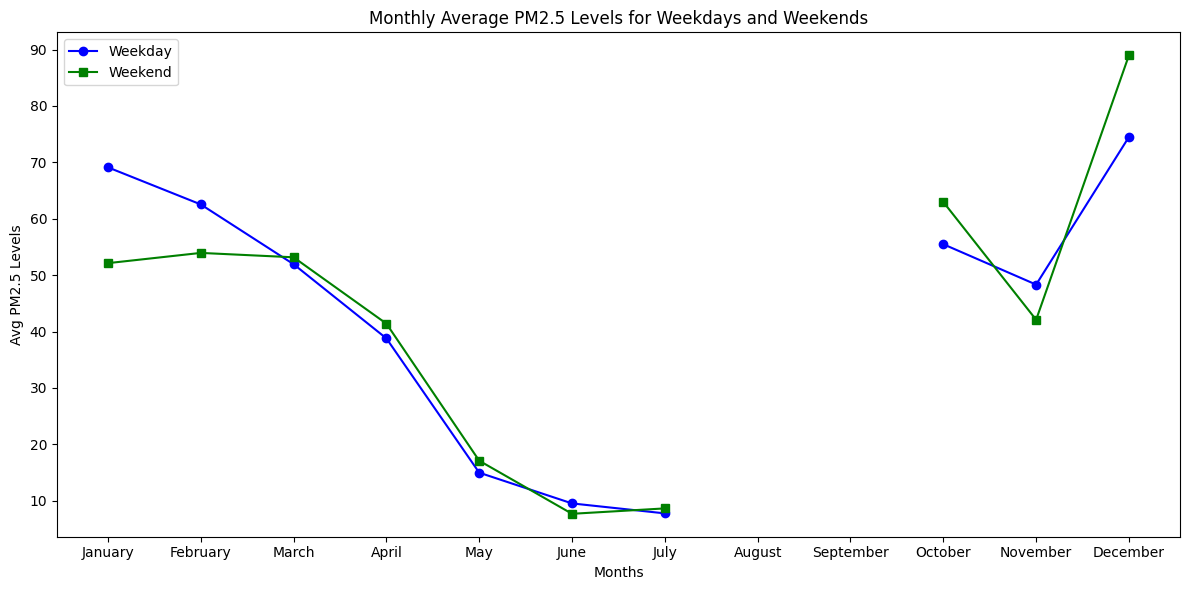

In [ ]:
#Making a new dataframe with required data, filtering for the station and dropping the column.
Data2_3=Data[["Timestamp","PM2.5","station"]].loc[(Data["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")].drop(["station"],axis=1)
#Converting Timestamp to pandas datetime and filtering for the year 2021.
Data2_3["Timestamp"]=pd.to_datetime(Data2_3["Timestamp"])
Data2_3=Data2_3[Data2_3["Timestamp"].dt.year==2021].reset_index(drop=True)
#Creating two seperate dataframes with weekdays and weekends.
Weekday=Data2_3[Data2_3["Timestamp"].dt.weekday<5]
Weekend=Data2_3[Data2_3["Timestamp"].dt.weekday>4]
#Grouping it on the basis of month and creating an array for Months.
Weekday_Avg=Weekday.groupby(Weekday["Timestamp"].dt.month).mean().drop(["Timestamp"],axis=1)
Weekend_Avg=Weekend.groupby(Weekend["Timestamp"].dt.month).mean().drop(["Timestamp"],axis=1)
x=["January","February","March","April","May","June","July","August","September","October","November","December"]

y1=Weekday_Avg["PM2.5"]
y2=Weekend_Avg["PM2.5"]
#Creating a subplot.
fig, ax = plt.subplots(figsize=(12, 6))
#Plot1 Weekday
ax.plot(x,y1,marker='o', color='blue', label='Weekday')
#Plot2 Weekend
ax.plot(x,y2,marker='s', color='green', label='Weekend')
#Setting labels titles and legend.
ax.set_xlabel("Months")
ax.set_ylabel("Avg PM2.5 Levels")
ax.set_title("Monthly Average PM2.5 Levels for Weekdays and Weekends")
plt.legend()
plt.tight_layout()
#Displaying the output.
plt.show()

# Spatio-temporal aggregation [3 marks]

1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [ ]:
#Created a new dataframe with required data and converted the timestamp to pandas datetime.
Data3_1=Data[["Timestamp","PM2.5","state"]]
Data3_1["Timestamp"]=pd.to_datetime(Data3_1["Timestamp"])
#Created a new dataframe Monsoon for Monsoon data and grouped it by state taking average over the PM2.5 Values.
Monsoon=Data3_1.set_index("Timestamp").loc['2022-06-01':'2022-09-30']
Monsoon=Monsoon.groupby('state')['PM2.5'].mean()
#Same with Summer
Summer=Data3_1.set_index("Timestamp").loc['2022-03-01':'2022-05-31']
Summer=Summer.groupby('state')['PM2.5'].mean()
#Calculating the percentage change and printing the one with the maximum change.
PercentageChange = (Monsoon - Summer)/Summer * 100
print(PercentageChange.abs(), '\n')
print(PercentageChange.abs().idxmax())

state
Andhra Pradesh       35.756894
Arunachal Pradesh    53.077110
Assam                61.176419
Bihar                53.000042
Chandigarh           45.124242
Chhattisgarh         10.975330
Delhi                55.293579
Gujarat              44.937747
Haryana              48.704688
Himachal Pradesh     37.067008
Jammu and Kashmir     0.003063
Jharkhand                  NaN
Karnataka            50.498558
Kerala               14.760499
Madhya Pradesh       56.251607
Maharashtra          52.706658
Manipur              48.441524
Meghalaya            48.546662
Mizoram              59.027533
Nagaland             56.249827
Odisha                6.712991
Puducherry           22.623792
Punjab               37.033255
Rajasthan            46.594606
Sikkim               51.805275
Tamil Nadu           17.987205
Telangana            50.160366
Tripura              56.657734
Uttar Pradesh        52.979157
Uttarakhand          49.964699
West Bengal          53.496777
Name: PM2.5, dtype: float64 

Ass

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\478198846.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data3_1["Timestamp"]=pd.to_datetime(Data3_1["Timestamp"])


2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?

<Figure size 1000x600 with 0 Axes>

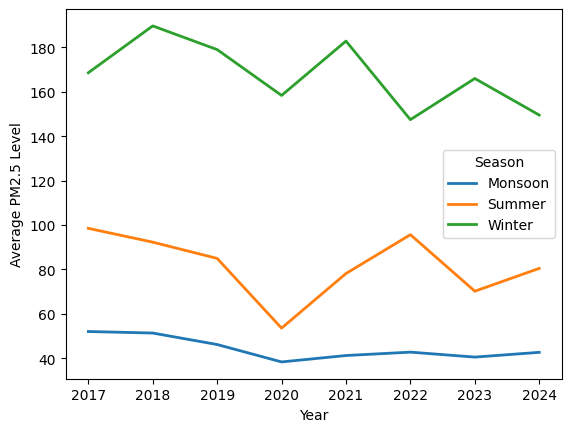

In [ ]:
#Converting the dataframe to pandas date and time.
Data['Timestamp'] = pd.to_datetime(Data['Timestamp'], format='%Y-%m-%d')

# Extract Year and Month
Data['Year'] = Data['Timestamp'].dt.year
Data['Month'] = Data['Timestamp'].dt.month


Data3_2 = Data[Data['state'] == 'Delhi'].copy()

# Categorize seasons and apply them to months
def categorize_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
    else:
        return None

Data3_2['Season'] = Data3_2['Month'].apply(categorize_season)

# Group by Year and Season, then calculate average PM2.5 levels
seasonal_pm25 = Data3_2.groupby(['Year', 'Season'])['PM2.5'].mean().unstack()

# Plotting
plt.figure(figsize=(10, 6))
seasonal_pm25.plot(kind='line', linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.legend(title="Season")
plt.show()


3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)

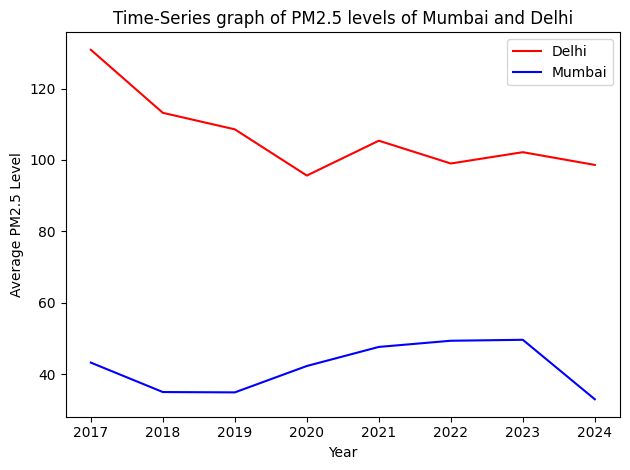

Standard Deviation (Fluctuation) - Delhi: 11.33
Standard Deviation (Fluctuation) - Mumbai: 6.83


In [455]:
# Creating separate column for years and making different dataframes for mumbai and delhi.
Data['Year'] = Data['Timestamp'].dt.year

delhi_data = Data[Data['state'] == 'Delhi']
mumbai_data = Data[Data['city'] == 'Mumbai']

# Finding average PM2.5 levels per year for both cities
delhi2point5 = delhi_data.groupby('Year')['PM2.5'].mean()
mumbai2point5 = mumbai_data.groupby('Year')['PM2.5'].mean()

#plotting the graph for the Year vs Average PM2.5 levels.
plt.plot(delhi2point5, linestyle='-', color='red', label='Delhi')
plt.plot(mumbai2point5, linestyle='-', color='blue', label='Mumbai')
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Level")
plt.title("Time-Series graph of PM2.5 levels of Mumbai and Delhi")
plt.legend()
plt.tight_layout()
#plt.grid(True)
plt.show()

# Calculate fluctuation using standard deviation
delhi_fluctuation = delhi2point5.std()
mumbai_fluctuation = mumbai2point5.std()
print(f"Standard Deviation (Fluctuation) - Delhi: {delhi_fluctuation:.2f}")
print(f"Standard Deviation (Fluctuation) - Mumbai: {mumbai_fluctuation:.2f}")

# Population-Based [3 Marks]

1. Which state in India has the highest number of monitoring stations relative to its population? 

In [ ]:
df1=pd.read_csv('Data.csv')
df1=df1.rename(columns={'state': 'State'})
#Grouping by state and counting number of stations
dff=df1.groupby('State')['station'].count()
df3=dff
df2=pd.read_csv('State_data.csv')
#Merging the state data with dff and dropping off unnecessary column.
dff=pd.merge(dff,df2,on='State')
dff=dff.drop(columns=['Area (km2)'])
#Calculating per capita data and  finding the max.
dff['station per capita']=dff['station']/dff['Population']
max_index = dff['station per capita'].idxmax()
#Printing the corresponding State.
corresponding_state = dff.loc[max_index, 'State']
print(corresponding_state)

Chandigarh


2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.

         State      PM2.5  Population  Population density  PM2.5 per capita
4   Chandigarh  59.414055     1055450         9258.333333          0.000056
24      Sikkim  14.927530      610577           86.045237          0.000024
27     Tripura  80.469872     3673917          350.197026          0.000022
21  Puducherry  24.286078     1247953         2605.329854          0.000019
19    Nagaland  32.721157     1978502          119.337837          0.000017


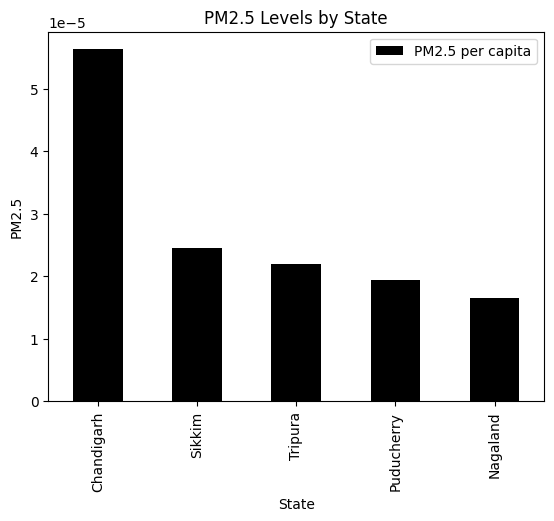

     State     PM2.5  Population  Population density  PM2.5 per capita
Chandigarh 59.414055     1055450         9258.333333          0.000056
    Sikkim 14.927530      610577           86.045237          0.000024
   Tripura 80.469872     3673917          350.197026          0.000022
Puducherry 24.286078     1247953         2605.329854          0.000019
  Nagaland 32.721157     1978502          119.337837          0.000017


In [ ]:
dfd=df1
#Converting Timestamp to pandas datetime and selecting year 2023.
dfd['Timestamp']=pd.to_datetime(dfd['Timestamp'])
dfd = dfd[dfd['Timestamp'].dt.year == 2023]
#Grouping by State and taking the mean and merging the two dataframes.
dfbar=dfd.groupby('State')['PM2.5'].mean()
dfbar=pd.merge(dfbar,df2,on='State')
dfbar=dfbar.drop(columns=['Area (km2)'])
#Calculating per capita data and sorting the values to get top 5 states.
dfbar['PM2.5 per capita']=dfbar['PM2.5']/dfbar['Population']
dfbar_sorted=dfbar.sort_values(by='PM2.5 per capita', ascending=False)
dfbar_sorted=dfbar_sorted.head()
print(dfbar_sorted)
#Plotting the graph
dfbar_sorted.plot(kind='bar', x='State',y='PM2.5 per capita',color='black')
#Labelling the graph and adding a title.
plt.title('PM2.5 Levels by State')
plt.xlabel('State')
plt.ylabel('PM2.5')
plt.show()
print(dfbar_sorted.to_string(index=False))
# to_string(index=False) helps us drop the index section completely

3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?

X-axis: Population density (people per square kilometer).

Y-axis: Average PM2.5 concentration.

Use a scatter plot to show the relationship, where each point represents a state.


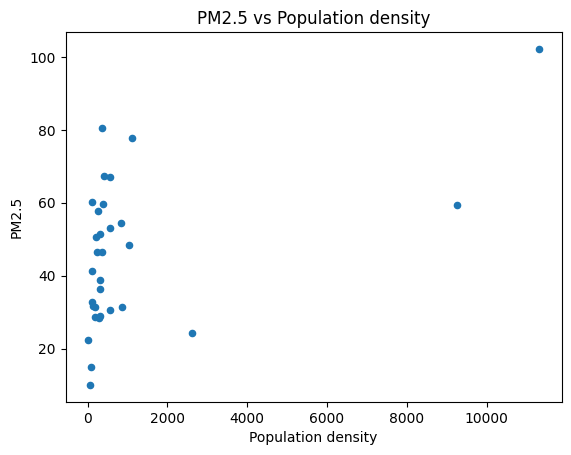

                State  Population  Area (km2)  Population density       PM2.5  \
0       Uttar Pradesh   199812341      240928          829.344622   54.485003   
1         Maharashtra   112374333      307713          365.192023   46.548890   
2               Bihar   104099452       94163         1105.523953   77.647134   
3         West Bengal    91276115       88752         1028.440091   48.367169   
4      Madhya Pradesh    72626809      308252          235.608557   46.360596   
5          Tamil Nadu    72147030      130058          554.729659   30.690996   
6           Rajasthan    68548437      342239          200.294055   50.621775   
7           Karnataka    61095297      191791          318.551428   28.857851   
8             Gujarat    60439692      196024          308.328021   51.507093   
9      Andhra Pradesh    49577103      162975          304.200663   36.294259   
10             Odisha    41974219      155707          269.571818   57.625852   
11          Telangana    350

In [ ]:
#Claculating population density.
df2['Population density']=df2['Population']/df2['Area (km2)']
dfr=pd.merge(df2,dfbar)
#Plotting the graph.
dfr.plot(kind='scatter',x='Population density',y='PM2.5')
plt.title('PM2.5 vs Population density')
plt.show()
print(dfr)

# Area Based [3 Marks]

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.

X-axis: States.

Y-axis: PM2.5 concentration per square kilometer.

Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


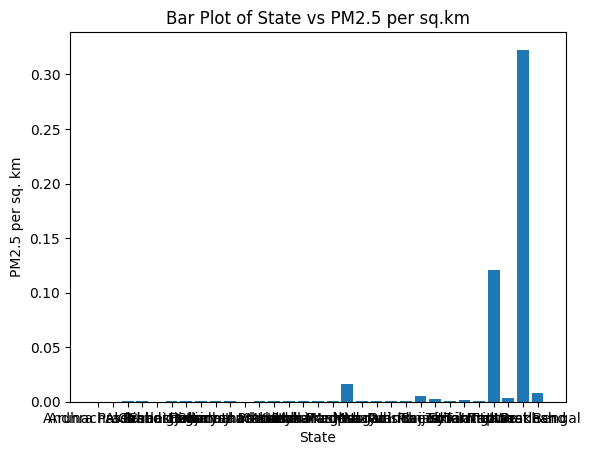

<Figure size 1000x600 with 0 Axes>

In [475]:
#Grouping the pollution data by state and finding the mean PM2.5 levels of each state, resetting index so that i can still access the 'state' column
Data5_1 = (Data.groupby(['state'])['PM2.5'].mean()).reset_index()
#Getting only the states in State_data whose PM2.5 levels is available (precautionary step) and then sorting by state name
states = (State_data[State_data['State'].isin(Data5_1['state'])]).sort_values(by='State')
#Finding the PM2.5 level/area
PM25byArea = Data5_1['PM2.5']/states['Area (km2)']
#Plotting the graph 
plt.bar(states['State'], PM25byArea)
plt.ylabel("PM2.5 per sq. km")
plt.xlabel("State")
plt.title("Bar Plot of State vs PM2.5 per sq.km")
plt.figure(figsize=(10, 6))
plt.tight_layout()
plt.show()

2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

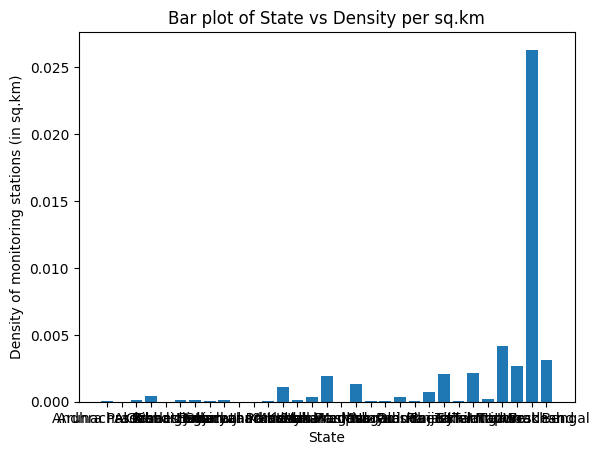

In [479]:
#Removing the NaN values from the PM2.5 column
filteredData = Data.dropna(subset=['PM2.5'])


#counting the number of stations in each state
stations = Data.groupby(['state'])['station']
count = stations.nunique().reset_index()

#Getting the number of stations per square kilometer
area = State_data.sort_values(by='State')
density = count['station']/area['Area (km2)']

plt.xlabel("State")
plt.ylabel("Density of monitoring stations (in sq.km)")
plt.title("Bar plot of State vs Density per sq.km")
plt.bar(area['State'], density)
plt.show()

3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.

In [483]:
#Masking the data for year 2021.
year_mask = Data.reset_index()['Timestamp'].str[:4] == '2021'
twenty21 = Data.loc[year_mask]
#Grouping it by state and taking the mean values for PM2.5.
mean2point5 = twenty21.groupby(['state'])['PM2.5'].mean().reset_index()
#Taking the data for Maharashtra and Madhya Pradesh.
ans = mean2point5.loc[mean2point5['state'].isin(['Maharashtra', 'Madhya Pradesh'])]
print(ans, '\n')

#finding population density
mhmp= State_data[State_data['State'].isin(['Maharashtra', 'Madhya Pradesh'])]
PopulationDensity = mhmp['Population']/mhmp['Area (km2)']
PopulationDensity.name = 'Population Density'
#Joining the data.
ans = pd.DataFrame(mhmp['State']).join(PopulationDensity, how='outer')
print(ans)
print("\n The higher the average PM2.5 levels the lower is the population density")

             state      PM2.5
14  Madhya Pradesh  47.095952
15     Maharashtra  46.440044 

            State  Population Density
1     Maharashtra          365.192023
4  Madhya Pradesh          235.608557

 The higher the average PM2.5 levels the lower is the population density


# Funding Based [3 Marks]

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

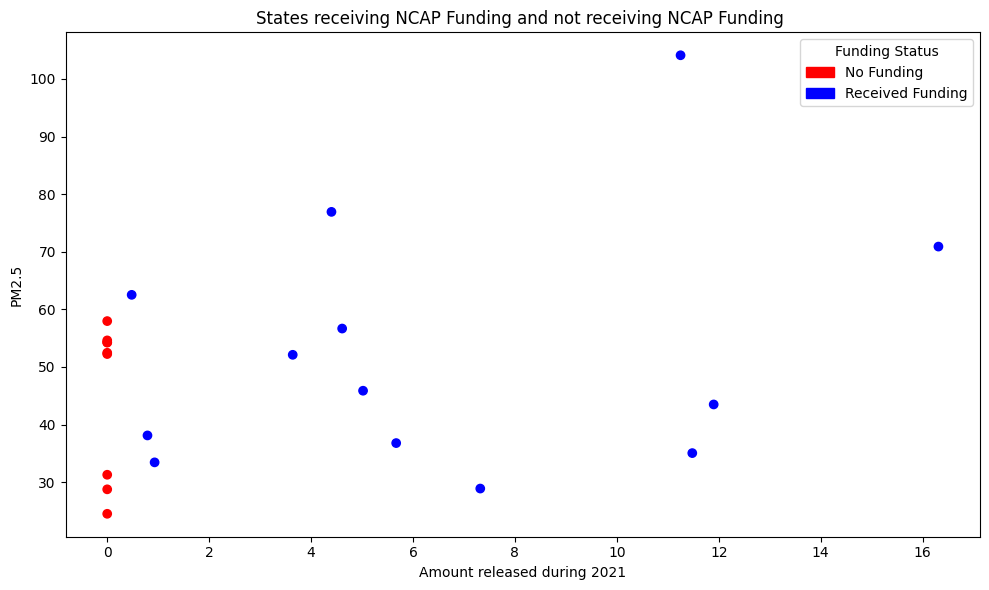

In [ ]:
import matplotlib.patches as mpatches
#Importing mpatches for legend.
dfn=pd.read_csv('NCAP_Funding.csv')
#Converting the data to numeric and taking the sum.
dfn['Amount released during FY 2021-22'] = pd.to_numeric(dfn['Amount released during FY 2021-22'], errors='coerce')
dfn=dfn.groupby('State')['Amount released during FY 2021-22'].sum()
#Taking the mean of PM2.5 data after grouping by state and merging with Funding data.
dfq=df1.groupby('State')['PM2.5'].mean()
dfn=pd.merge(dfn,dfq,on='State')
#Setting the colour code.
dfn['Color'] = dfn['Amount released during FY 2021-22'].apply(lambda x: 'red' if x == 0 else 'blue')
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dfn['Amount released during FY 2021-22'], dfn['PM2.5'], c=dfn['Color'])
plt.xlabel('Amount released during 2021')
plt.ylabel('PM2.5')
plt.title("States receiving NCAP Funding and not receiving NCAP Funding ")
#Adding the legend.
red_patch = mpatches.Patch(color='red', label='No Funding')
blue_patch = mpatches.Patch(color='blue', label='Received Funding')
plt.legend(handles=[red_patch, blue_patch], title="Funding Status")
plt.tight_layout()
plt.show()

2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\850380040.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20c', len(dfn['State']))


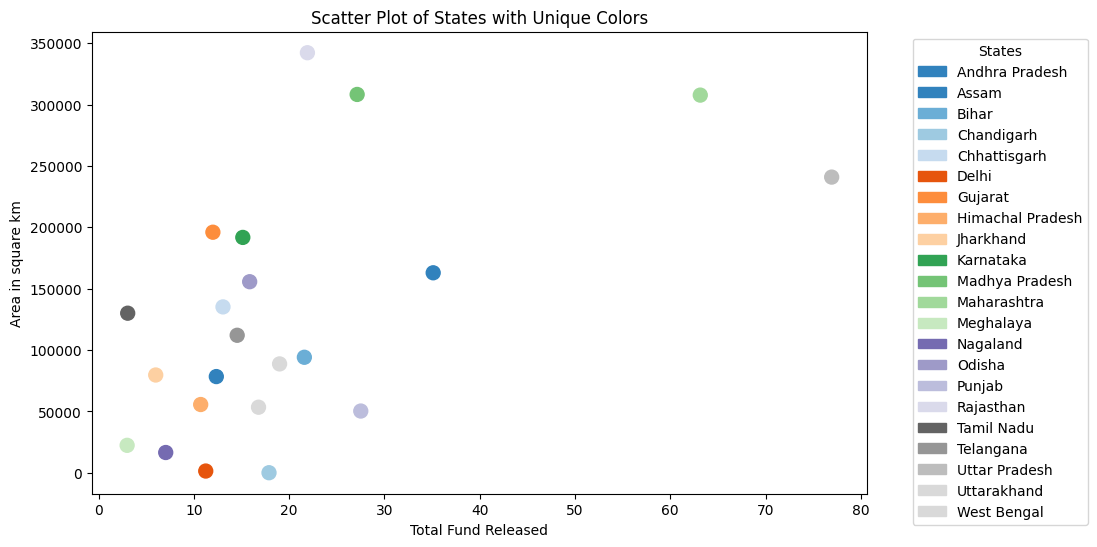

In [539]:
dfn=pd.read_csv('NCAP_Funding.csv')
#Grouping the Data and totaling the sum state wise.
dfTF=dfn.groupby('State')['Total fund released'].sum()
dfn=pd.merge(dfTF,df2,on='State')

colors = plt.cm.get_cmap('tab20c', len(dfn['State']))
print(colors)

dfn['Color'] = [colors(i) for i in range(len(dfn['State']))]

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(dfn['Total fund released'], dfn['Area (km2)'], c=dfn['Color'], s=100)

# Adding labels and title
plt.xlabel('Total Fund Released')
plt.ylabel('Area in square km')
plt.title('Scatter Plot of States with Unique Colors')

legend_patches = [mpatches.Patch(color=dfn['Color'].iloc[i], label=dfn['State'].iloc[i]) for i in range(len(dfn))]

# Adding the legend
plt.legend(handles=legend_patches, title="States", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Miscellaneous Questions [5 Marks]

1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [ ]:
#Creating A DataFrame with required details and converting Timestamp to pandas datetime.
Data7_1=Data[["Timestamp","city","PM2.5"]]
Data7_1["Timestamp"]=pd.to_datetime(Data7_1["Timestamp"])
#Selecting the year 2023.
Data7_1=Data7_1.set_index("Timestamp").loc['2023-01-01':'2023-12-31']
#Grouping by city and took mean of PM2.5 data.
Most_Polluted=Data7_1.groupby(["city"]).mean()
#Finding the city with the highest average PM2.5
index1=Most_Polluted.loc[(Most_Polluted["PM2.5"]==Most_Polluted["PM2.5"].max())]
City=index1.index[0]
#Calculating the percentage of days.
Data7_1=Data7_1.loc[(Data7_1["city"]==City)]
Percentage=len(Data7_1[Data7_1["PM2.5"]>300])/len(Data7_1[Data7_1["PM2.5"]>0])*100
Percentage

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\561613277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data7_1["Timestamp"]=pd.to_datetime(Data7_1["Timestamp"])


23.076923076923077

2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\2449738427.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data7_2["Timestamp"]=pd.to_datetime(Data7_2["Timestamp"])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\2449738427.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data7_2['Year'] = Data7_2['Timestamp'].dt.year
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19728\2449738427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

Year         2018        2019        2020
Month                                    
1      130.719255  128.754818   93.976363
2       99.978603   83.608939   78.278732
3       79.550203   64.996508   45.623990
4       69.322005   64.209081   35.581806
5       70.814234   65.573679   37.054964
6       61.812184   49.348104   31.862489
7       36.528488   35.333657   25.500864
8       36.005141   28.212876   20.846027
9       44.262769   29.937402   35.316891
10      90.932236   75.976643   79.100185
11     129.385647  118.345948  112.871261
12     142.907230  115.800002  111.684691


<Figure size 1000x600 with 0 Axes>

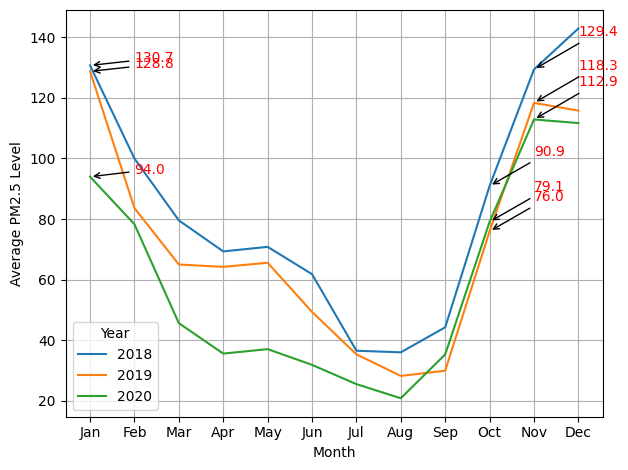

This makes sense as Diwali usually starts mid-October and ends mid-November


In [ ]:
#Getting the required data.
Data7_2=Data[["Timestamp","PM2.5","city"]]
Data7_2["Timestamp"]=pd.to_datetime(Data7_2["Timestamp"])
Data7_2['Year'] = Data7_2['Timestamp'].dt.year
Data7_2['Month'] = Data7_2['Timestamp'].dt.month

#Finding the mean PM2.5 levels for each month in Delhi
yearfilter = Data7_2[Data7_2['Year'].isin([2018, 2019, 2020])]
means = yearfilter.groupby(['Year', 'Month'])['PM2.5'].mean().unstack(level=0)
print(means)
# Plotting
plt.figure(figsize=(10, 6))
means.plot()
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Level")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Year")

plt.grid(True)
#Pointing arrows at required data. 
for year in [2018, 2019, 2020]:
    for month in [1,10,11]:
        plt.annotate(
            f"{means.loc[month, year]:.1f}",  # Annotate with the PM2.5 value
            xy=(month, means.loc[month, year]),  # Arrow points to the October value
            xytext=(month+1, means.loc[month, year] + month),  # Offset text for readability
            arrowprops=dict(facecolor="red", arrowstyle="->"),
            fontsize=10,
            color="red"
    )
plt.tight_layout()
plt.show()
print("This makes sense as Diwali usually starts mid-October and ends mid-November")

3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.

       Timestamp  PM2.5
0     2017-01-01    NaN
1     2017-01-01    NaN
2     2017-01-01    NaN
3     2017-01-01    NaN
4     2017-01-01    NaN
...          ...    ...
35152 2024-12-10  36.27
35153 2024-12-10  56.76
35154 2024-12-10  63.89
35155 2024-12-10  69.66
35156 2024-12-10  75.00

[35157 rows x 2 columns]


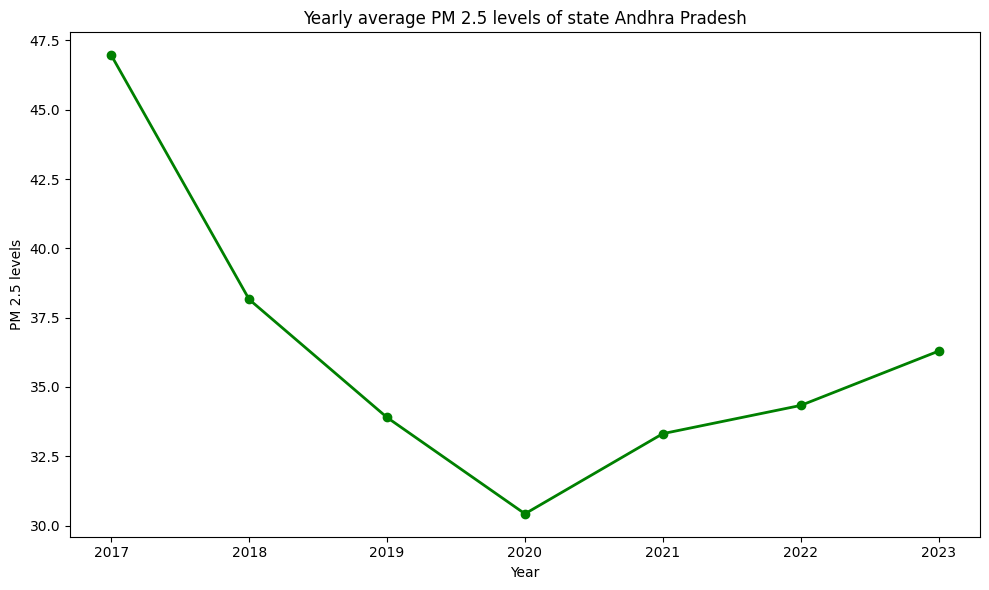

In [ ]:
#Dropped the unnecessary columns and replaced '-' with 0.
Data7_3=NCAP_Funding.drop(['S. No.','City','Total fund released','Utilisation as on June 2022'],axis=1)
Data7_3=Data7_3.replace({'-':0})
#Taking the columns which have the funds and convert them all to float.
Data7_3.iloc[:,1:] = Data7_3.iloc[:,1:].map(float)
#Taking sum by grouping by State and finding the state with highets funding in FY2020.
Data7_3=Data7_3.groupby(['State']).sum()
State=Data7_3.loc[(Data7_3["Amount released during FY 2020-21"]==Data7_3["Amount released during FY 2020-21"].max())].index[0]
#Taking the PM2.5 Data of the state and connverting the timestamp to pandas datetime.
Final=Data[["Timestamp","PM2.5","state"]].loc[(Data["state"]==State)].reset_index(drop="True")
Final=Final.drop(["state"],axis=1)
Final["Timestamp"]=pd.to_datetime(Final["Timestamp"])
#Grouping it by year till 2023.
Final=Final.groupby(Final["Timestamp"].dt.year).mean().drop(["Timestamp"],axis=1)
Final=Final.drop(2024,axis=0)
#Plotting the Graph
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(Final.index,Final.values,marker='o',linestyle='-',color='green',linewidth=2)
#Adding the title and labels
ax.set_title(f'Yearly average PM 2.5 levels of state {State}')
ax.set_xlabel('Year')
ax.set_ylabel('PM 2.5 levels')
ax.grid
plt.tight_layout()


4. Draw the map of India and plot the sensor locations on the map.

In [502]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
#Taking the longitudes and latitudes.
x=Data[["latitude","longitude","station"]].groupby(["station"]).mean()
long_lat_data = x

# Creating a map with a specific projection 
fig, ax = plt.subplots(figsize=(80, 80), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_title('Sensor Locations in India')
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

ax.set_extent([68, 98, 6, 37], crs=ccrs.PlateCarree())  # [min_lon, max_lon, min_lat, max_lat]

# Plotting sensor locations
for i in range(len(x)):
    ax.plot(x.iloc[i,1], x.iloc[i,0], marker='o', color='red', markersize=20, transform=ccrs.PlateCarree())
    ax.text(x.iloc[i,1], x.iloc[i,0], x.index[i], color='black', fontsize=7, transform=ccrs.PlateCarree())  # City names

plt.tight_layout()
plt.show()